### In this Second NB , I pre-processed the features AND modelled it !

In [1]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


import re


from nltk.corpus import stopwords
import pickle

from tqdm import tqdm
import os

In [2]:
train = pd.read_csv('clean train.csv' )
test = pd.read_csv('clean test.csv')

In [3]:
train.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,winery,variety
0,wineschach,argentina,Casarena 2011 Lauren's Vineyard Malbec (Agrelo),A heavily charred nose puts a burnt crust on t...,laurens_vineyard,89,40.0,mendoza_province,agrelo,casarena,malbec
1,wineschach,argentina,Casarena 2009 Estate Bottled Cabernet Sauvigno...,rubberi dens aroma murki green side leafi toma...,estate_bottled,84,17.0,mendoza_province,agrelo,casarena,cabernet_sauvignon
2,wineschach,argentina,El Enemigo 2013 Gran Enemigo Agrelo Single Vin...,ripe malti berri aroma blend seamlessli darker...,gran_enemigo_agrelo_single_vineyard,93,120.0,mendoza_province,agrelo,el_enemigo,cabernet_franc
3,wineschach,argentina,Finca Decero 2009 Remolinos Vineyard Cabernet ...,standard cherri plum aroma creat straightforwa...,remolinos_vineyard,87,22.0,mendoza_province,agrelo,finca_decero,cabernet_sauvignon
4,wineschach,argentina,Finca Decero 2008 Amano Remolinos Vineyard Red...,dens nose mix black fruit aroma mild herb pala...,amano_remolinos_vineyard,90,50.0,mendoza_province,agrelo,finca_decero,bordeaux_style_red_blend


In [201]:
train.columns.values

array(['user_name', 'country', 'review_title', 'review_description',
       'designation', 'points', 'price', 'province', 'region_1', 'winery',
       'variety'], dtype=object)

## Pre processing Categorical Features

Removing space, '@' from  user_name , and converting to lower case

In [202]:
train['user_name'] = train['user_name'].str.replace('-','_')
train['user_name'] = train['user_name'].str.replace('@','')
train['user_name'] = train['user_name'].str.lower()

In [203]:
test['user_name'] = test['user_name'].str.replace('-','_')
test['user_name'] = test['user_name'].str.replace('@','')
test['user_name'] = test['user_name'].str.lower()

For Country 

In [204]:
train['country'] = train['country'].str.lower()
test['country'] = test['country'].str.lower()

train['country'] = train['country'].str.replace(' ','_')
test['country'] = test['country'].str.replace(' ','_')

train['country'] = train['country'].str.replace('-','_')
test['country'] = test['country'].str.replace('-','_')

train['country'] = train['country'].str.replace("'","")
test['country'] = test['country'].str.replace("'","")

train['country'] = train['country'].str.replace("&","_")
test['country'] = test['country'].str.replace("&","_")

For Designation , doing the same

In [205]:
train['designation'] = train['designation'].str.lower()
train['designation'] = train['designation'].str.replace(' ','_')
train['designation'] = train['designation'].str.replace('-','_')
train['designation'] = train['designation'].str.replace(',','_')
train['designation'] = train['designation'].str.replace('&','_')
train['designation'] = train['designation'].str.replace("'","") #Removing single quotes!

In [206]:
test['designation'] = test['designation'].str.lower()
test['designation'] = test['designation'].str.replace(' ','_')
test['designation'] = test['designation'].str.replace('-','_')
test['designation'] = test['designation'].str.replace(',','_')
test['designation'] = test['designation'].str.replace('&','_')
test['designation'] = test['designation'].str.replace("'","") #Removing single quotes!

For Province

In [207]:
train['province'] = train['province'].str.lower()
train['province'] = train['province'].str.replace(' ','_')
train['province'] = train['province'].str.replace("'" ,"")
train['province'] = train['province'].str.replace('&','_')
train['province'] = train['province'].str.replace('.','')
train['province'] = train['province'].str.replace(',','')

In [208]:
test['province'] = test['province'].str.lower()
test['province'] = test['province'].str.replace(' ','_')
test['province'] = test['province'].str.replace("'" ,"")
test['province'] = test['province'].str.replace('&','_')
test['province'] = test['province'].str.replace('.','')
test['province'] = test['province'].str.replace(',','')

For Region 1

In [209]:
train['region_1'] = train['region_1'].str.lower()
train['region_1'] = train['region_1'].str.replace(' ','_')
train['region_1'] = train['region_1'].str.replace("'" ,"")
train['region_1'] = train['region_1'].str.replace('&','_')
train['region_1'] = train['region_1'].str.replace(',','_')
train['region_1'] = train['region_1'].str.replace('.','')

In [210]:
test['region_1'] = test['region_1'].str.lower()
test['region_1'] = test['region_1'].str.replace(' ','_')
test['region_1'] = test['region_1'].str.replace("'" ,"")
test['region_1'] = test['region_1'].str.replace('&','_')
test['region_1'] = test['region_1'].str.replace(',','_')
test['region_1'] = test['region_1'].str.replace('.','')

For Winery

In [211]:
train['winery'] = train['winery'].str.lower()
train['winery'] = train['winery'].str.replace(' ','_')
train['winery'] = train['winery'].str.replace("'" ,"")
train['winery'] = train['winery'].str.replace(',','_')
train['winery'] = train['winery'].str.replace('.','')

In [212]:
test['winery'] = test['winery'].str.lower()
test['winery'] = test['winery'].str.replace(' ','_')
test['winery'] = test['winery'].str.replace("'" ,"")
test['winery'] = test['winery'].str.replace(',','_')
test['winery'] = test['winery'].str.replace('.','')

For variety

In [213]:
train['variety'] = train['variety'].str.lower()
train['variety'] = train['variety'].str.replace(' ','_')
train['variety'] = train['variety'].str.replace("'" ,"")
train['variety'] = train['variety'].str.replace('&','_')
train['variety'] = train['variety'].str.replace('-','_')

For description

In [214]:
import re

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk

In [215]:
train['review_description'][4222]

"Light wood aging gives this wine a very smooth character. It's acidity and varietal character are subsumed into an almost Chardonnay richness and weight. The balance and the ripe flavors are impressive, while the final taste does bring out the pepper character of the grape."

In [216]:
stopword_list = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [217]:

ps = PorterStemmer()

for i in range(1,len(train['review_description'])):
    clean_dis = re.sub('[^a-zA-Z]',' ',train['review_description'][i])
    clean_dis = clean_dis.lower()
    clean_dis = clean_dis.split()
    clean_dis = [word for word in clean_dis if not word in stopword_list]
    clean_dis = [ps.stem(word) for word in clean_dis]
    train['review_description'][i] = ' '.join(clean_dis)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [223]:
train['review_description']

0        A heavily charred nose puts a burnt crust on t...
1        rubberi dens aroma murki green side leafi toma...
2        ripe malti berri aroma blend seamlessli darker...
3        standard cherri plum aroma creat straightforwa...
4        dens nose mix black fruit aroma mild herb pala...
                               ...                        
76977    wine aroma honeysuckl lemon curd flavor lemon ...
76978    blend gamay prokup aroma tart cherri mediterra...
76979    plum black cherri anis lead nose rich red flav...
76980    mouthwat blend start nose fresh mint pineappl ...
76981    balanc aroma green herb citru zest fresh vital...
Name: review_description, Length: 76982, dtype: object

Doing same for Test

In [219]:
ps = PorterStemmer()

for i in range(1,len(test['review_description'])):
    clean_disc = re.sub('[^a-zA-Z]',' ',test['review_description'][i])
    clean_disc = clean_disc.lower()
    clean_disc = clean_disc.split()
    clean_disc = [word for word in clean_disc if not word in stopword_list]
    clean_disc = [ps.stem(word) for word in clean_disc]
    test['review_description'][i] = ' '.join(clean_disc)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [2]:
train = pd.read_csv('pp train.csv' )
test = pd.read_csv('pp test.csv')

### Pre processing Numerical Values : price 

In [3]:
import seaborn as sns

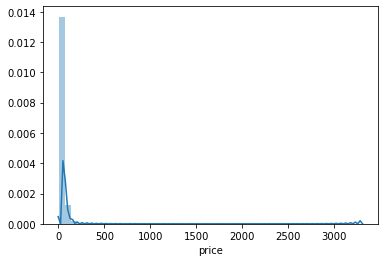

In [11]:
sns.distplot(train['price']);

Price is heavily skewed . One option is to Remove the high priced wines but we could be losing important info from that. or we can use log value of it.

In [3]:
log_price = np.log(train.price)
log_price2 = np.log(test.price)

In [4]:
train['price'] = log_price

In [5]:
test['price'] = log_price2

In [6]:
train['price']

0        3.688879
1        2.833213
2        4.787492
3        3.091042
4        3.912023
           ...   
76977    1.791759
76978    1.791759
76979    3.610918
76980    3.332205
76981    2.484907
Name: price, Length: 76982, dtype: float64

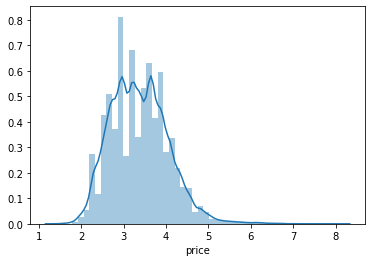

In [9]:
sns.distplot(train['price']);

No need to Normalize Points

## Vectorization


In [7]:
X = train.drop([ 'variety' , 'review_title'] ,axis = 1)
y = train['variety']

In [8]:
from sklearn.preprocessing import LabelEncoder

#label_encoder = LabelEncoder().fit(y) 
#y = label_encoder.transform(y)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.18, stratify=y) # Using train to 'train' n test on CV !

#### X_test will be used for final predictions , while X_cv , y_cv will be used to check train accuracy 

In [9]:
X_test = test.drop(['review_title'] ,axis = 1) 

#### Vectorizing Review_description - Using TFIDF


In [10]:
vec = TfidfVectorizer(min_df= 100 , max_df = 5000, ngram_range=(1,3))

X_train_RD = vec.fit_transform(X_train['review_description'].values)
 
X_cv_RD = vec.transform(X_cv['review_description'].values)

X_test_RD = vec.transform(X_test['review_description'].values)



Converting Categorical data to Response Code ( Best for tree based models)

In [11]:
class RE:
    final_count = dict()
    
    def count(self,c1 ,c2):
        item_count = pd.crosstab(c1 , c2)
        total_count = c1.value_counts()
        
        for i in c1.unique():
            RE.final_count[i] = [item_count.loc[i][0]/total_count[i],\
                                 item_count.loc[i][1]/total_count[i] ]
        
    def transform(self, data):
        encoded = []
        for j in data:
            if j in RE.final_count.keys():
                encoded.append(RE.final_count[j])
            else:
                encoded.append([0.5,0.5])
        return np.array(encoded)

In [42]:
train.columns

Index(['user_name', 'country', 'review_title', 'review_description',
       'designation', 'points', 'price', 'province', 'region_1', 'winery',
       'variety'],
      dtype='object')

In [12]:
# ENCODING USER_NAME

response_code = RE()
response_code.count(X_train['user_name'] , y_train) #For Counting from train values taking mean response !

x_train_un = response_code.transform(X_train['user_name'].values)  #Applying it in train

x_cv_un = response_code.transform(X_cv['user_name'].values) # Applying it on Cv , only transform is needed

x_test_un = response_code.transform(X_test['user_name'].values) # Only transform is done so no data is leaked !

In [13]:
# ENCODING COUNTRY

response_code = RE()
response_code.count(X_train['country'] , y_train) #For Counting from train values taking mean response !

x_train_cnt = response_code.transform(X_train['country'].values)  #Applying it in train

x_cv_cnt = response_code.transform(X_cv['country'].values) # Applying it on Cv , only transform is needed

x_test_cnt = response_code.transform(X_test['country'].values) # Only transform is done so no data is leaked !

In [14]:
# ENCODING designation

response_code = RE()
response_code.count(X_train['designation'] , y_train) #For Counting from train values taking mean response !

x_train_desig = response_code.transform(X_train['designation'].values)  #Applying it in train

x_cv_desig = response_code.transform(X_cv['designation'].values) # Applying it on Cv , only transform is needed

x_test_desig = response_code.transform(X_test['designation'].values) # Only transform is done so no data is leaked !

In [15]:
# ENCODING province

response_code = RE()
response_code.count(X_train['province'] , y_train) #For Counting from train values taking mean response !

x_train_prov = response_code.transform(X_train['province'].values)  #Applying it in train !

x_cv_prov = response_code.transform(X_cv['province'].values) # Applying it on Cv , only transform is needed !

x_test_prov = response_code.transform(X_test['province'].values) # Only transform is done so no data is leaked !

In [16]:
# ENCODING region_1

response_code = RE()
response_code.count(X_train['region_1'] , y_train) #For Counting from train values taking mean response !

x_train_r1 = response_code.transform(X_train['region_1'].values)  #Applying it in train

x_cv_r1 = response_code.transform(X_cv['region_1'].values) # Applying it on Cv , only transform is needed

x_test_r1 = response_code.transform(X_test['region_1'].values) # Only transform is done so no data is leaked !

In [17]:
# ENCODING winery

response_code = RE()
response_code.count(X_train['winery'] , y_train) #For Counting from train values taking mean response !

x_train_wnry = response_code.transform(X_train['winery'].values)  #Applying it in train !

x_cv_wnry = response_code.transform(X_cv['winery'].values) # Applying it on Cv , only transform is needed !

x_test_wnry = response_code.transform(X_test['winery'].values) # Only transform is done so no data is leaked !

Numerical Features - We have already taken log for price to get a uniform distribution

In [18]:

from sklearn.preprocessing import MinMaxScaler # FOR PRICE!

scaler = MinMaxScaler()
scaler.fit(X_train['price'].values.reshape(-1,1))

X_train_pr = scaler.transform(X_train['price'].values.reshape(-1,1))

X_cv_pr = scaler.transform(X_cv['price'].values.reshape(-1,1))

X_test_pr = scaler.transform(X_test['price'].values.reshape(-1,1))

In [19]:
from sklearn.preprocessing import MinMaxScaler # FOR POINTS !

scaler = MinMaxScaler()
scaler.fit(X_train['points'].values.reshape(-1,1))

X_train_poi = scaler.transform(X_train['points'].values.reshape(-1,1))

X_cv_poi = scaler.transform(X_cv['points'].values.reshape(-1,1))

X_test_poi = scaler.transform(X_test['points'].values.reshape(-1,1))

ALL FEATURES ARE ENCODED AND READY TO MODEL !

In [20]:
from scipy.sparse import hstack

In [21]:
X_tr = hstack((X_train_RD,x_train_un, x_train_cnt , x_train_desig ,x_train_prov ,x_train_r1 ,x_train_wnry ,X_train_pr ,X_train_poi )).tocsr()



In [53]:
X_cv = hstack((X_cv_RD ,x_cv_un, x_cv_cnt , x_cv_desig ,x_cv_prov ,x_cv_r1 ,x_cv_wnry ,X_cv_pr ,X_cv_poi )).tocsr()


In [22]:
X_te = hstack((X_test_RD ,x_test_un, x_test_cnt , x_test_desig ,x_test_prov ,x_test_r1 ,x_test_wnry ,X_test_pr ,X_test_poi )).tocsr()


##### NOTE: X_te will be used for final predictions , while X_cv will be used to check train model accuracy

#### Feature Selection - To select k best features from the sparce matrix

In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_tr_new = SelectKBest(chi2).fit_transform(X_tr, y_train)

In [29]:
X_tr.shape

(32800, 1661)

### Applying Models !


##### Building a dummy Model - KNN

In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score


knn = KNeighborsClassifier()

n_neighbors = [2,5,8,11]
wt =  [ 'uniform', 'distance' ]

random_grid = {'n_neighbors': n_neighbors,
               'weights': wt, }

clf = RandomizedSearchCV(estimator = knn , param_distributions = random_grid , cv=4 , n_jobs = -1) 

clf.fit(X_tr, y_train) 



/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'n_neighbors': [2, 5, 8, 11],
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [116]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=-1, n_neighbors=5,
                                                  p=2, weights='uniform')
knn.fit(X_tr, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [117]:
y_pred = knn.predict(X_cv)
f1 = f1_score(y_cv , y_pred, average = 'micro')
acc =  knn.score(X_cv ,y_cv)

In [202]:
print('F1 for kNN mode is : ' ,f1)

F1 for kNN mode is :  0.521629600472348


Its a pretty weak model !

#### Random Forest

In [167]:
# Parameter Tuning !
from sklearn.model_selection import RandomizedSearchCV

bootstrap =  [True, False]
max_depth = [ 10, 20 ,50,60 , 70, 80] 
n_est = [100,200,500,700,1000 ]

rf = RandomForestClassifier(class_weight = 'balanced')

random_grid = {'n_estimators': n_est,
               'max_depth': max_depth,
               }

clf = RandomizedSearchCV(estimator = rf , param_distributions = random_grid , cv=4 , n_iter = 10 , n_jobs = -1) 

clf.fit(X_tr , y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
         

In [168]:
bestRFparams = clf.best_estimator_
bestRFparams

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=80, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini',max_depth=120 ,max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs= -1 , oob_score=True ,random_state=None,
                       verbose=0, warm_start=False)

rf.fit(X_tr, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=120, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=-1, oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [29]:
from sklearn.metrics import f1_score
y_pred = rf.predict(X_cv)
f1_ = f1_score(y_cv , y_pred, average = 'micro')
acc =  rf.score(X_cv ,y_cv)

In [30]:
print( 'micro weighted f1 score for RF tree is :' , f1_)
print( 'Accuracy score for RF tree is :' , acc)

micro weighted f1 score for RF tree is : 0.7919444444444445
Accuracy score for RF tree is : 0.7919444444444445


### CV Score is 0.79 : A better Model, Lets see other options

In [203]:
import pickle
filename = 'rf2_model.sav'
pickle.dump(rf, open(filename, 'wb'))

## XGBOOST

In [56]:
from xgboost import XGBClassifier

p = dict()
p['num_class'] = 28 
p['objective'] = 'multi:softmax'

xgb = XGBClassifier( max_depth= 100 , n_estimators = 1000 )

xgb.fit(X_tr, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=100,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [57]:
from sklearn.metrics import f1_score
y_pred = xgb.predict(X_cv)

f1_ = f1_score(y_cv , y_pred, average = 'micro')


In [58]:
print( 'micro weighted f1 score for XGB  is :' , f1_)

micro weighted f1 score for XGB  is : 0.7478888888888889


#### CV Accuracy for XGB is : 0.747

### SUMMARY OF MODELS

In [60]:
from prettytable import PrettyTable

t = PrettyTable( [ '________Model__________' ,'_________CV Score_________'] )

t.add_row( ['KNN' , '0.53'] )

t.add_row([ 'RF', '0.79'])

t.add_row([ 'XGB', '0.747'])

print(t)

+-------------------------+----------------------------+
| ________Model__________ | _________CV Score_________ |
+-------------------------+----------------------------+
|           KNN           |            0.53            |
|            RF           |            0.79            |
|           XGB           |           0.747            |
+-------------------------+----------------------------+


#### The Random Forest Model work best for Our MultiClass Classification Problem !

## Predicting wine for test data !

In [62]:
X_train = train.drop([ 'variety' , 'review_title'] ,axis = 1) 

#I Ran all Vectorization again from top to get 'X_tr'

y_train = train['variety']

In [24]:
X_test = X_te

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini',max_depth=120 ,max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs= -1 , oob_score=True ,random_state=None,
                       verbose=0, warm_start=False)

rf.fit(X_tr, y_train) # I got X_tr after running all vectorization again for full X_train DATA !

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=120, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=-1, oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [30]:
y_pred = rf.predict(X_test)

In [36]:
test.drop(['review_title'] , axis= 1 , inplace = True)

In [39]:
test['variety_pred'] = y_pred

In [42]:
test.to_csv('Test with preds.csv' , index = False) # SAVING THE TEST FILE WITH PREDICTIONS

In [46]:
X_train['variety'] = y_train

In [48]:
X_train.to_csv('Final_train.csv' , index = False )

### END OF ASSIGNMENT